# Extraction de Keywords

## Imports

In [182]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

In [183]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [184]:
# Lister les Fichiers
data_path = "../../data/txt/"
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

In [185]:
for f in sorted(files)[1136:1236]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1900-01-02_01-00002.txt mentions these keywords: HAUTE COUR, Boers Londres, procureur général, Boers n’ont, colonne boer, positions boers, d’un Boer, Boers d’un, Daily Mail...
KB_JB838_1900-01-07_01-00007.txt mentions these keywords: BELLE MAISON, dit notaire, rue Fossé, notaires Bruxelles, dits notaires, notaire Van, notaires Vergote, Bruxelles Etude, bénéfice d’enchères, notaire Gérard, notaires Declerck, Belle Vue, D’une belle, RENTIER rue...
KB_JB838_1900-01-08_01-00003.txt mentions these keywords: rue Van, Van Haelten, Jolie maison, rangs épais, Notaire Dubost, valeur réelle, Notaire Van, Belle maison, rue Guillaume, MEUBLEE Maison...
KB_JB838_1900-01-18_01-00008.txt mentions these keywords: Agence Rossel, rue Van, poste Centre, désire louer, Van Artevelde, rue Rogier, poste Nord, rue Verte, maisons louer, louer maison, poste rue...
KB_JB838_1900-01-19_01-00004.txt mentions these keywords: rue Van, Agence Rossei, demande servante, demande bonne, fille sach, demande place,

# Nuages de mots

## Imports

In [186]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zack\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Stopwords

In [209]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "tel", "tél", "rue", 
       "bruxelles", "Bruxelles", "Brux", "brux", "maison", "lundi", "mardi", "mercredi", 
       "jeudi", "vendredi", "samedi", "dimanche", "semaine", "ecrire", "bon", "ecr", 
       "fille", "vendre", "louer", "demande", "femme", "place", "prix", "ans", "tres", 
       "très", "heures", "heure", "midi", "grand", "cuit", "cuis", "sach", "des", "dès", 
       "bonne", "peu", "nord", "chez", "mois", "servantes", "poste", "bons", "bon", "quart", 
       "jours", "jour", "etc", "toute", "tout", "tous", "toutes", "vend", "près", "chaussée", 
       "hier", "eau", "soir", "chambre", "belle", "leur", "leurs", "grand", "grande", "francs", 
       "avenue", "suite", "petit", "quelques", "a", "à", "â", "abord", "afin", "ah", "ai", 
       "aie", "ainsi", "allaient", "allo", "allô", "allons", "après", "assez", "attendu", 
       "au", "aucun", "aucune", "aujourd", "aujourd'hui", "auquel", "aura", "auront", "aussi", 
       "autre", "autres", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", 
       "avec", "avoir", "ayant", "b", "bah", "beaucoup", "bien", "bigre", "boum", "bravo", "brrr", 
       "c", "ça", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", 
       "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "cent", "cependant", "certain", 
       "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", 
       "ceux-là", "chacun", "chaque", "cher", "chère", "chères", "chers", "chez", "chiche", "chut", 
       "ci", "cinq", "cinquantaine", "cinquante", "cinquantième", "cinquième", "clac", "clic", 
       "combien", "comme", "comment", "compris", "concernant", "contre", "couic", "crac", "d", "da", 
       "dans", "de", "debout", "dedans", "dehors", "delà", "depuis", "derrière", "des", "dès", "dés", 
       "désormais", "desquelles", "desquels", "dessous", "dessus", "deux", "deuxième", "deuxièmement", 
       "devant", "devers", "devra", "différent", "différente", "différentes", "différents", "dire", 
       "divers", "diverse", "diverses", "dix", "dix-huit", "dixième", "dix-neuf", "dix-sept", "doit", 
       "doivent", "donc", "dont", "douze", "douzième", "dring", "du", "duquel", "durant", "e", "effet", 
       "eh", "elle", "elle-même", "elles", "elles-mêmes", "en", "encore", "entre", "envers", "environ", 
       "es", "ès", "est", "et", "etant", "étaient", "étais", "était", "étant", "etc", "été", "etre", 
       "être", "eu", "euh", "eux", "eux-mêmes", "excepté", "f", "façon", "fais", "faisaient", "faisant", 
       "fait", "feront", "fi", "flac", "floc", "font", "g", "gens", "h", "ha", "hé", "hein", "hélas", 
       "hem", "hep", "hi", "ho", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", 
       "huitième", "hum", "hurrah", "i", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "k", "l", 
       "la", "là", "laquelle", "las", "le", "lequel", "les", "lès", "lesquelles", "lesquels", "leur", 
       "leurs", "longtemps", "lorsque", "lui", "lui-même", "m", "ma", "maint", "mais", "malgré", "me", 
       "même", "mêmes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "moi", 
       "moi-même", "moins", "mon", "moyennant", "n", "na", "ne", "néanmoins", "neuf", "neuvième", "ni", 
       "nombreuses", "nombreux", "non", "nos", "notre", "nôtre", "nôtres", "nous", "nous-mêmes", "nul", 
       "o", "o|", "ô", "oh", "ohé", "olé", "ollé", "on", "ont", "onze", "onzième", "ore", "ou", "où", 
       "ouf", "ouias", "oust", "ouste", "outre", "p", "paf", "pan", "par", "parmi", "partant", 
       "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "personne", "peu", 
       "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "plein", "plouf", "plus", "plusieurs", 
       "plutôt", "pouah", "pour", "pourquoi", "premier", "première", "premièrement", "près", "proche", 
       "psitt", "puisque", "q", "qu", "quand", "quant", "quanta", "quant-à-soi", "quarante", "quatorze", 
       "quatre", "quatre-vingt", "quatrième", "quatrièmement", "que", "quel", "quelconque", "quelle", 
       "quelles", "quelque", "quelques", "quelqu'un", "quels", "qui", "quiconque", "quinze", "quoi", 
       "quoique", "r", "revoici", "revoilà", "rien", "s", "sa", "sacrebleu", "sans", "sapristi", "sauf", 
       "se", "seize", "selon", "sept", "septième", "sera", "seront", "ses", "si", "sien", "sienne", 
       "siennes", "siens", "sinon", "six", "sixième", "soi", "soi-même", "soit", "soixante", "son", 
       "sont", "sous", "stop", "suis", "suivant", "sur", "surtout", "t", "ta", "tac", "tant", "te", 
       "té", "tel", "telle", "tellement", "telles", "tels", "tenant", "tes", "tic", "tien", "tienne", 
       "tiennes", "tiens", "toc", "toi", "toi-même", "ton", "touchant", "toujours", "tous", "tout", 
       "toute", "toutes", "treize", "trente", "très", "trois", "troisième", "troisièmement", "trop", 
       "tsoin", "tsouin", "tu", "u", "un", "une", "unes", "uns", "v", "va", "vais", "vas", "vé", "vers", 
       "via", "vif", "vifs", "vingt", "vivat", "vive", "vives", "vlan", "voici", "voilà", "vont", "vos", 
       "votre", "vôtre", "vôtres", "vous", "vous-mêmes", "vu", "w", "x", "y", "z", "zut", "alors", 
       "aucuns", "bon", "devrait", "dos", "droite", "début", "essai", "faites", "fois", "force", "haut", 
       "ici", "juste", "maintenant", "mine", "mot", "nommés", "nouveaux", "parce", "parole", "personnes", 
       "pièce", "plupart", "seulement", "soyez", "sujet", "tandis", "valeur", "voie", "voient", "état", 
       "étions", "cour", "anvers", "vente", "serv", "centre", "lieu", "commerce", "salle", "matin", 
       "porte", "mme", "homme", "hommes", "cuisine", "hom", "quartier", "pers", "personnes", "personne",
       "enf", "enfant", "enfants", "point", "jamais", "petite", "vie", "fort", "prés", "janvier", 
       "fevrier", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", 
       "décembre", "seul", "seule", "voir", "déjà", "vient", "beau", "belle", "beaux", "belles", "fin", 
       "gros", "chamb", "puis", "boulevard", "nouveau", "nouvelle", "nouveaux", "nouvelles", "dame", 
       "dames", "demi", "journ", "fit", "donner", "fils", "garçon", "choix", "louer", "loué", "louée", 
       "servante", "jeune", "général", "adr", "bne", "cert", "pet", "gaz", "jne", "temps", "agence", 
       "notaire"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [211]:
# Choisir une année
year = 1900

In [212]:
# Lister les fichiers de cette année
data_path = '../../data'
txt_path = '../../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [213]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [214]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage

In [215]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [216]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1900_clean.txt!'

In [217]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'BRETELLE ORIGINES PINIONS CONTRADICTOIRES REMONTE HONORABLE ANTIQUITÉ FORMES SERVI MAINTENIR CULOTTE TARD PANTALON LOUIS PHILIPPE GLOIRE VIT CULOTTES PONT GARDE NATIONALE ROI MÉME ESTAMPES RECHERCHÉES AMATEUR APPARAIT NÉGLIGÉ ÊPAUIE ORNÉE BRETELLE TAPISSERIE OFFRANDE CONJUGALE BOMU VEINE MARIE AMÉLIE BRETELLE ANGLAIS CHOSES SERVENT DAN COURANTE ACCESSOIRE PRATIQUE COMMODE CONSERVE SERVICES RENDUS NOMBRE ENNEMIS IRRÉDUCTIBLES GLISSONS HONORONS BRETELLE TENONS ATILE COMMODE INDISPENSABLE CCESSOIRE'

## Nuage de mots

### Afficher les termes les plus fréquents


In [218]:
frequencies = Counter(after.split())
print(frequencies.most_common(100))

[('PARIS', 372), ('ANGLAIS', 289), ('BOURG', 286), ('FER', 261), ('JARDIN', 260), ('PRÉSIDENT', 247), ('MOD', 246), ('ROI', 243), ('GOUVERNEMENT', 236), ('PAYS', 235), ('PART', 235), ('HÔTEL', 234), ('FRANCE', 232), ('CONTENANT', 232), ('PARTIE', 226), ('GUERRE', 225), ('ADRESSER', 225), ('OUVRIERS', 223), ('CAMP', 215), ('ORD', 215), ('COURS', 212), ('CAUSE', 212), ('OUVRIER', 211), ('LOI', 210), ('NOTAIRES', 210), ('PROP', 209), ('TRAVAIL', 208), ('GARE', 205), ('MORT', 203), ('ORDRE', 197), ('OCCASION', 197), ('COURSES', 197), ('MINISTRE', 196), ('MOMENT', 196), ('SERVICE', 195), ('MÉN', 195), ('RÉF', 192), ('CAP', 189), ('BUREAU', 188), ('BELGIQUE', 187), ('ART', 185), ('COM', 185), ('QUESTION', 184), ('RENTIER', 184), ('SOCIÉTÉ', 181), ('GARNI', 181), ('ILLE', 181), ('ROYALE', 180), ('COUP', 179), ('TERRE', 178), ('MONDE', 177), ('MARCHÉ', 176), ('COURANT', 176), ('SAINT', 175), ('BOERS', 175), ('BELGE', 175), ('BOIS', 174), ('PRINCE', 173), ('ETAT', 173), ('IXELLES', 173), ('BEL'

### Créer, stocker et afficher le nuage de mots

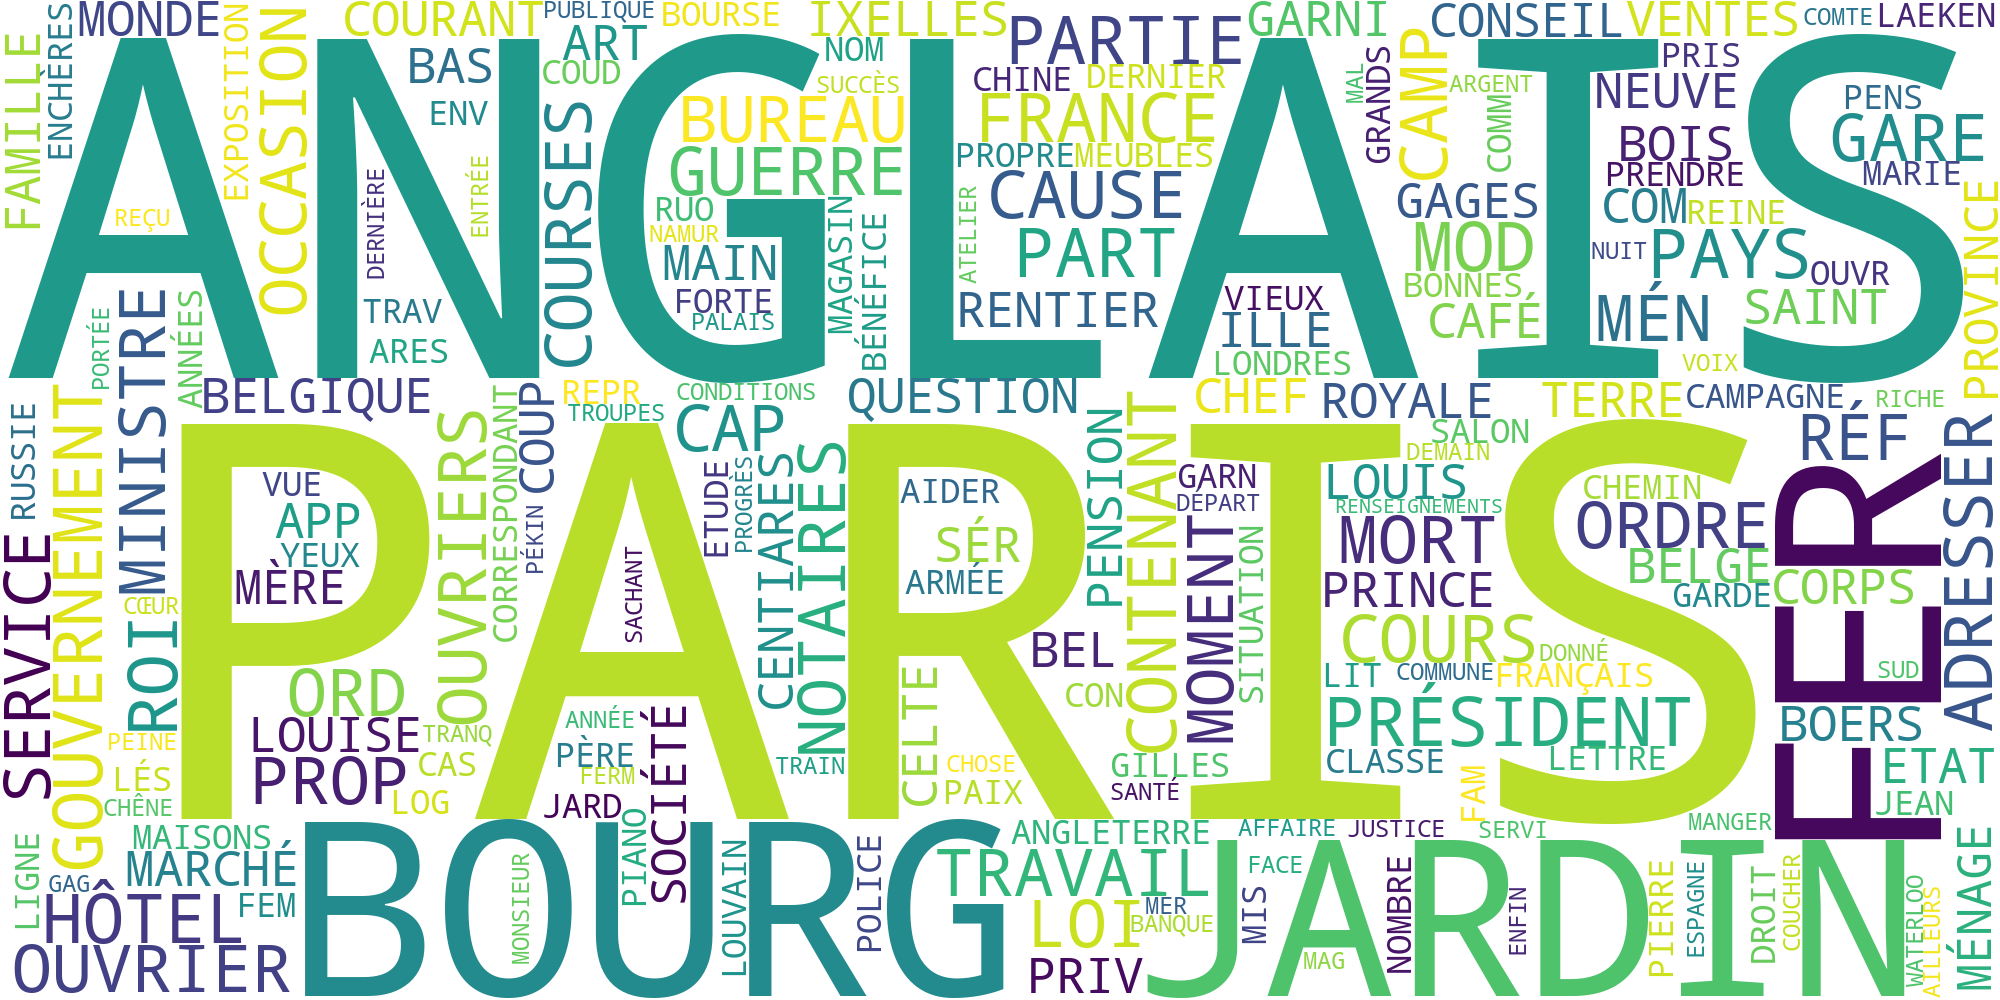

In [219]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

## Imports

In [197]:
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
!pip install  fr_core_news_md


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [198]:
nlp = spacy.load('fr_core_news_md')

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [199]:
# Charger le texte
text = open("../../data/Annee_1900/all_1900.txt", encoding='utf-8').read()

In [200]:
%%time
# Traiter le texte
doc = nlp(text)

CPU times: total: 2min 37s
Wall time: 3min 4s


In [201]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

## Liste

### Liste des personnes (PER) les plus mentionnées dans le corpus

In [202]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Rossel apparait 143 fois dans le corpus
Agence Rossel apparait 32 fois dans le corpus
Guérin apparait 26 fois dans le corpus
Jeanne apparait 22 fois dans le corpus
Louise apparait 20 fois dans le corpus
Kossel apparait 15 fois dans le corpus
M. Travers apparait 14 fois dans le corpus
Ladysmith apparait 13 fois dans le corpus
Emile apparait 13 fois dans le corpus
général Buller apparait 12 fois dans le corpus
Mérode apparait 11 fois dans le corpus
French apparait 9 fois dans le corpus
Frère apparait 9 fois dans le corpus
Louis XV apparait 9 fois dans le corpus
Van Artevelde apparait 9 fois dans le corpus
Mme de Rambure apparait 9 fois dans le corpus
Mrs Anderson apparait 9 fois dans le corpus
magas apparait 8 fois dans le corpus
Anspach apparait 8 fois dans le corpus
b. cert apparait 8 fois dans le corpus
Messieurs apparait 7 fois dans le corpus
M. de Samery apparait 7 fois dans le corpus
Louis XVI apparait 7 fois dans le corpus
Buller apparait 7 fois dans le corpus
Tina apparait 7 fois

### Liste des lieux (LOC) les plus mentionnées dans le corpus

In [203]:
loc = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        loc[ent.text] += 1

sorted_loc = sorted(loc.items(), key=lambda kv: kv[1], reverse=True)

for loc, freq in sorted_loc[:50]:
    print(f"{loc} apparait {freq} fois dans le corpus")

Bruxelles apparait 165 fois dans le corpus
Boers apparait 88 fois dans le corpus
Paris apparait 56 fois dans le corpus
Anvers apparait 39 fois dans le corpus
Anglais apparait 38 fois dans le corpus
Angleterre apparait 35 fois dans le corpus
Centre apparait 34 fois dans le corpus
Midi apparait 34 fois dans le corpus
Nord apparait 33 fois dans le corpus
Belgique apparait 29 fois dans le corpus
Brux apparait 27 fois dans le corpus
Londres apparait 25 fois dans le corpus
Laeken apparait 25 fois dans le corpus
Ixelles apparait 23 fois dans le corpus
Etat apparait 21 fois dans le corpus
Bourse apparait 20 fois dans le corpus
Tugela apparait 19 fois dans le corpus
Agence Rossel apparait 19 fois dans le corpus
Allemagne apparait 18 fois dans le corpus
Schaerbeek apparait 18 fois dans le corpus
Liège apparait 17 fois dans le corpus
Charleroi apparait 17 fois dans le corpus
France apparait 16 fois dans le corpus
Namur apparait 16 fois dans le corpus
Louvain apparait 16 fois dans le corpus
Kimber

### Liste des organisations (ORG) les plus mentionnées dans le corpus

In [204]:
org = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        org[ent.text] += 1

sorted_org = sorted(org.items(), key=lambda kv: kv[1], reverse=True)

for org, freq in sorted_org[:50]:
    print(f"{org} apparait {freq} fois dans le corpus")

Qn dem apparait 48 fois dans le corpus
Chambre apparait 16 fois dans le corpus
An dem apparait 9 fois dans le corpus
FRONTIERE apparait 8 fois dans le corpus
Conseil apparait 7 fois dans le corpus
Times apparait 7 fois dans le corpus
Sénat apparait 6 fois dans le corpus
PIANOS apparait 6 fois dans le corpus
n dem apparait 5 fois dans le corpus
Aciéries apparait 5 fois dans le corpus
Daily Mail apparait 4 fois dans le corpus
Standard apparait 4 fois dans le corpus
Matelas laine apparait 4 fois dans le corpus
Banque Belge apparait 4 fois dans le corpus
Société apparait 4 fois dans le corpus
Tout-venant apparait 4 fois dans le corpus
Banque nationale apparait 4 fois dans le corpus
COIFFEUR apparait 4 fois dans le corpus
Parlement apparait 3 fois dans le corpus
AMEUBLEMENTS apparait 3 fois dans le corpus
pAtiss apparait 3 fois dans le corpus
trav apparait 3 fois dans le corpus
Le Soir apparait 3 fois dans le corpus
SOUWEINE apparait 3 fois dans le corpus
Bureau apparait 3 fois dans le corp

# Sentiment analysis 

### Imports

In [205]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

### Création d'une fonction `get_sentiment`

In [206]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

### Analyser le sentiment d'une phrase

In [207]:
sentence1="On dit que ces jeunes filles ont été victimes de la brutalité et de la férocité de leurs geôliers."
sentence2="L'éloquence est l'expression suprême de pensée artistique, tellement belle, émouvante, grandiose qu’il semble que la nature n’ait pas voulu qu’elle laissât des traces durables qu'elle meurt avec la voix, l'accent, le geste de Orateur."
sentence3="Si la lune avait des habitants, il y a longtemps que les Anglais seraient allés essayer de les déposséder !"
sentence4="Et il nous emmena dans son cabinet, où il nous fit voir une caisse bizarre qui arrivait en droite ligne d’une étoffe d’Afrique: —C’est là-dedans qu’un vieil ami à moi de là- bas m'a expédié les morceaux d'homme que vous venez de si bien déchiqueter ; il avait entouré ta chose de place et fait mariner les pièces de résistance, il a, du reste,agi en véritable gentleman, car , on ne se doute pas combien le cannibalisme ennoblit le cœur et éléve l'âme !"
sentence5="Cependant l’habitude du danger fait de la prudence une autre habitude."
sentence6="Pierre se mit à inspecter l’intérieur de l’église avec l'attention d’un homme qui cherche le salut."
sentence7="Le feu d'artifice de clôture de la foire, remis, lundi passé, parce que la pluie était tombée îusqu’à 4 heures de l’après-midi, a été tiré hier soir, à 9 heures et demie. "
sentence8="Peut-être y fait-il trop chaud."
sentence9="Une lassitude s’empare de tout le monde."
sentence10="On s’étale sur l’herbe encore humide, ou on s'insinue dans les meules dont les fortes senteurs embaument le petit vent aigrelet qui souffle. "

In [208]:
get_sentiment(sentence1)
get_sentiment(sentence2)
get_sentiment(sentence3)
get_sentiment(sentence4)
get_sentiment(sentence5)
get_sentiment(sentence6)
get_sentiment(sentence7)
get_sentiment(sentence8)
get_sentiment(sentence9)
get_sentiment(sentence10)

This text is 32% positive and 40% subjective.
This text is 42% positive and 57% subjective.
This text is 9% positive and 30% subjective.
This text is 5% positive and 31% subjective.
This text is 10% negative and perfectly objective.
This text is 7% negative and perfectly objective.
This text is 13% negative and 15% subjective.
This text is 12% positive and 12% subjective.
This text is 22% positive and 10% subjective.
This text is 16% positive and 17% subjective.
